<a href="https://colab.research.google.com/github/JeMinYoo/Aiffel-Quest/blob/master/Tf_flowers/flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os

# tf_flowers 데이터셋 로드
ds, info = tfds.load('tf_flowers', split='train', with_info=True)

# Google 드라이브에 저장할 디렉토리 경로
save_dir = '/content/drive/MyDrive/tf_flowers'

# 디렉토리 생성
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 데이터셋을 Google 드라이브에 저장
for i, example in enumerate(tfds.as_numpy(ds)):
    image = example['image']
    label = example['label']
    file_name = f'{save_dir}/image_{i}_label_{label}.jpeg'
    tf.keras.preprocessing.image.save_img(file_name, image)

    if i % 100 == 0:
        print(f'{i} images saved')

print('All images saved to Google Drive.')


Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.
0 images saved
100 images saved
200 images saved
300 images saved
400 images saved
500 images saved
600 images saved
700 images saved
800 images saved
900 images saved
1000 images saved
1100 images saved
1200 images saved
1300 images saved
1400 images saved
1500 images saved
1600 images saved
1700 images saved
1800 images saved
1900 images saved
2000 images saved
2100 images saved
2200 images saved
2300 images saved
2400 images saved
2500 images saved
2600 images saved
2700 images saved
2800 images saved
2900 images saved
3000 images saved
3100 images saved
3200 images saved
3300 images saved
3400 images saved
3500 images saved
3600 images saved
All images saved to Google Drive.


In [48]:
import tensorflow_datasets as tfds

# tf_flowers 데이터셋 다운로드 및 분할
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    name='tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    data_dir='/content/tensorflow_datasets/',  # 로컬 경로에 저장
    download=True,  # 데이터를 다운로드
    with_info=True,
    as_supervised=True,  # (image, label) 형태로 불러오기
)

# 데이터셋 확인
print(f"Train samples: {len(list(raw_train))}")
print(f"Validation samples: {len(list(raw_validation))}")
print(f"Test samples: {len(list(raw_test))}")


Train samples: 2936
Validation samples: 367
Test samples: 367


In [49]:
print(raw_train)
print(raw_validation)
print(raw_test)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [92]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras import layers, models

# 이미지 크기 지정
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

def preprocess(image, label):
    image = tf.image.resize(image, IMG_SIZE)
    image = preprocess_input(image)  # VGG16에 맞게 전처리
    return image, label

# 데이터셋 전처리 및 배치 처리
train_dataset = raw_train.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
validation_dataset = raw_validation.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = raw_test.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)


In [93]:
# 사전 학습된 VGG16 모델 불러오기 (ImageNet 가중치 사용, 최상위 레이어 포함 X)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(*IMG_SIZE, 3))

# 최상위 레이어 추가
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')  # tf_flowers 데이터셋은 5개의 클래스
])

# 베이스 모델을 학습되지 않도록 설정 (필요에 따라 동결 해제 가능)
base_model.trainable = False


In [94]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [95]:
EPOCHS = 10

history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=EPOCHS
)


Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 54s 393ms/step - accuracy: 0.6347 - loss: 16.1379 - val_accuracy: 0.8665 - val_loss: 1.0706
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 15s 158ms/step - accuracy: 0.9078 - loss: 0.8409 - val_accuracy: 0.8828 - val_loss: 0.9780
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 147ms/step - accuracy: 0.9314 - loss: 0.4483 - val_accuracy: 0.8583 - val_loss: 0.8827
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 22s 165ms/step - accuracy: 0.9482 - loss: 0.2964 - val_accuracy: 0.8447 - val_loss: 1.0849
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 15s 165ms/step - accuracy: 0.9432 - loss: 0.3575 - val_accuracy: 0.8420 - val_loss: 1.0122
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 146ms/step - accuracy: 0.9587 - loss: 0.2976 - val_accuracy: 0.8392 - val_loss: 1.3747
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 22s 158ms/step - accuracy: 0.9492 - loss: 0.3311 - val_accuracy: 0.8665 - val_loss: 1.0424
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 152ms/step - accuracy: 0.9669 - loss: 0.2092 - val_acc

In [96]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test accuracy: {test_accuracy:.2f}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - accuracy: 0.8673 - loss: 1.2608
Test accuracy: 0.87


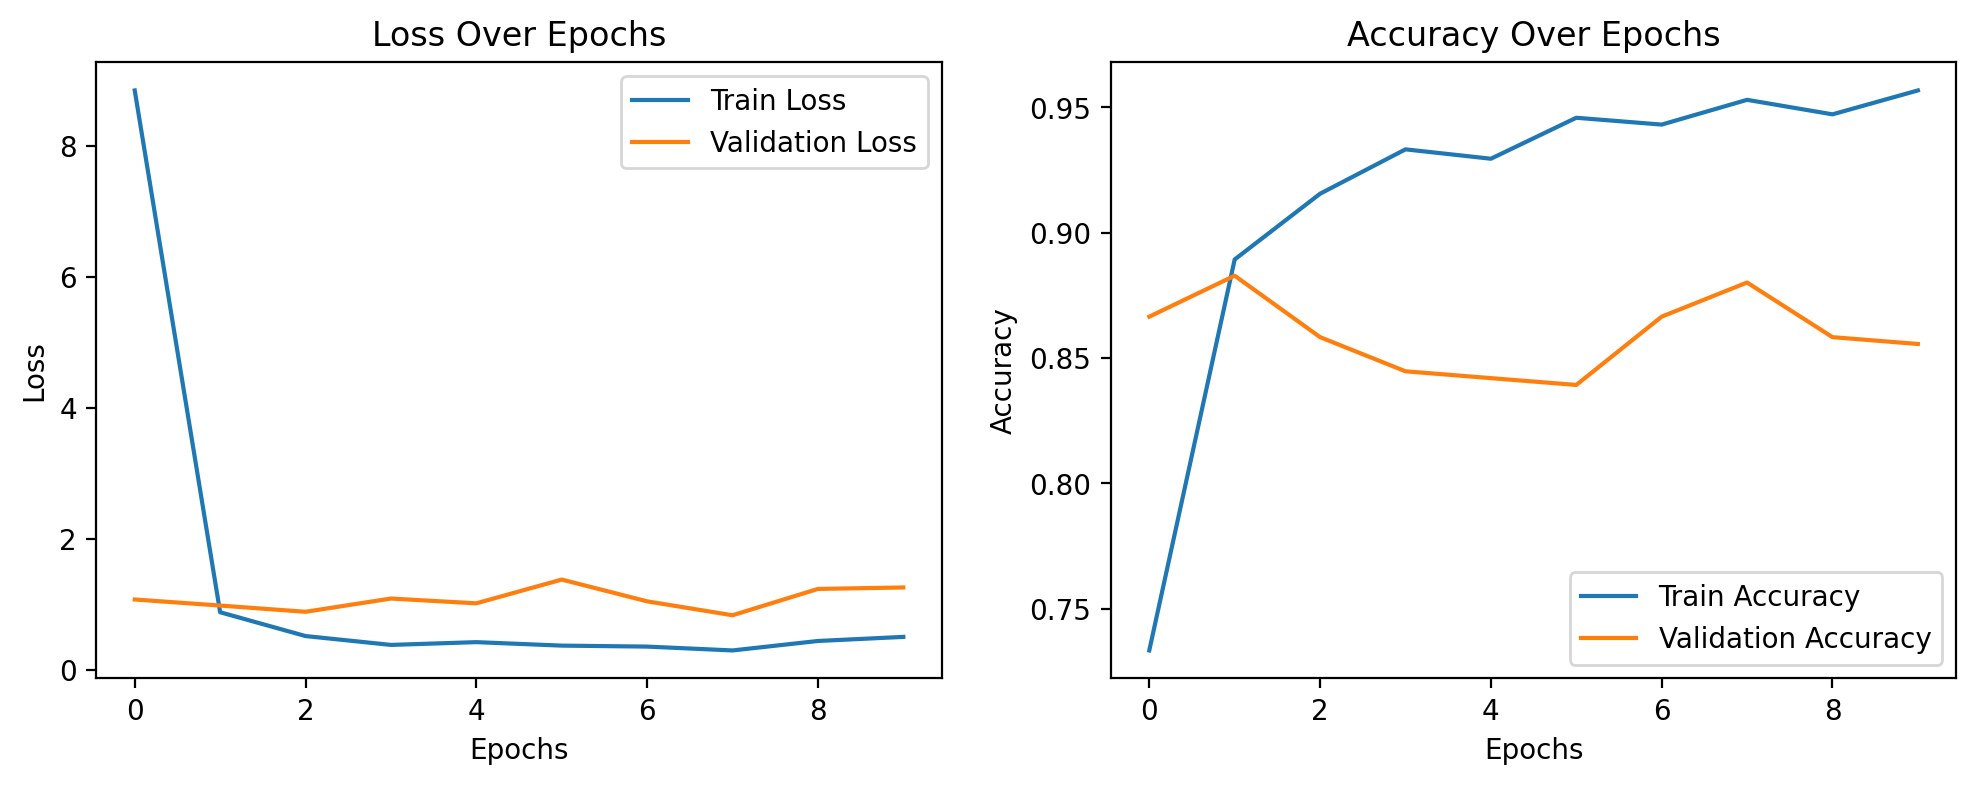

In [97]:
import matplotlib.pyplot as plt

# 학습 손실 및 검증 손실 그래프
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 학습 정확도 및 검증 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


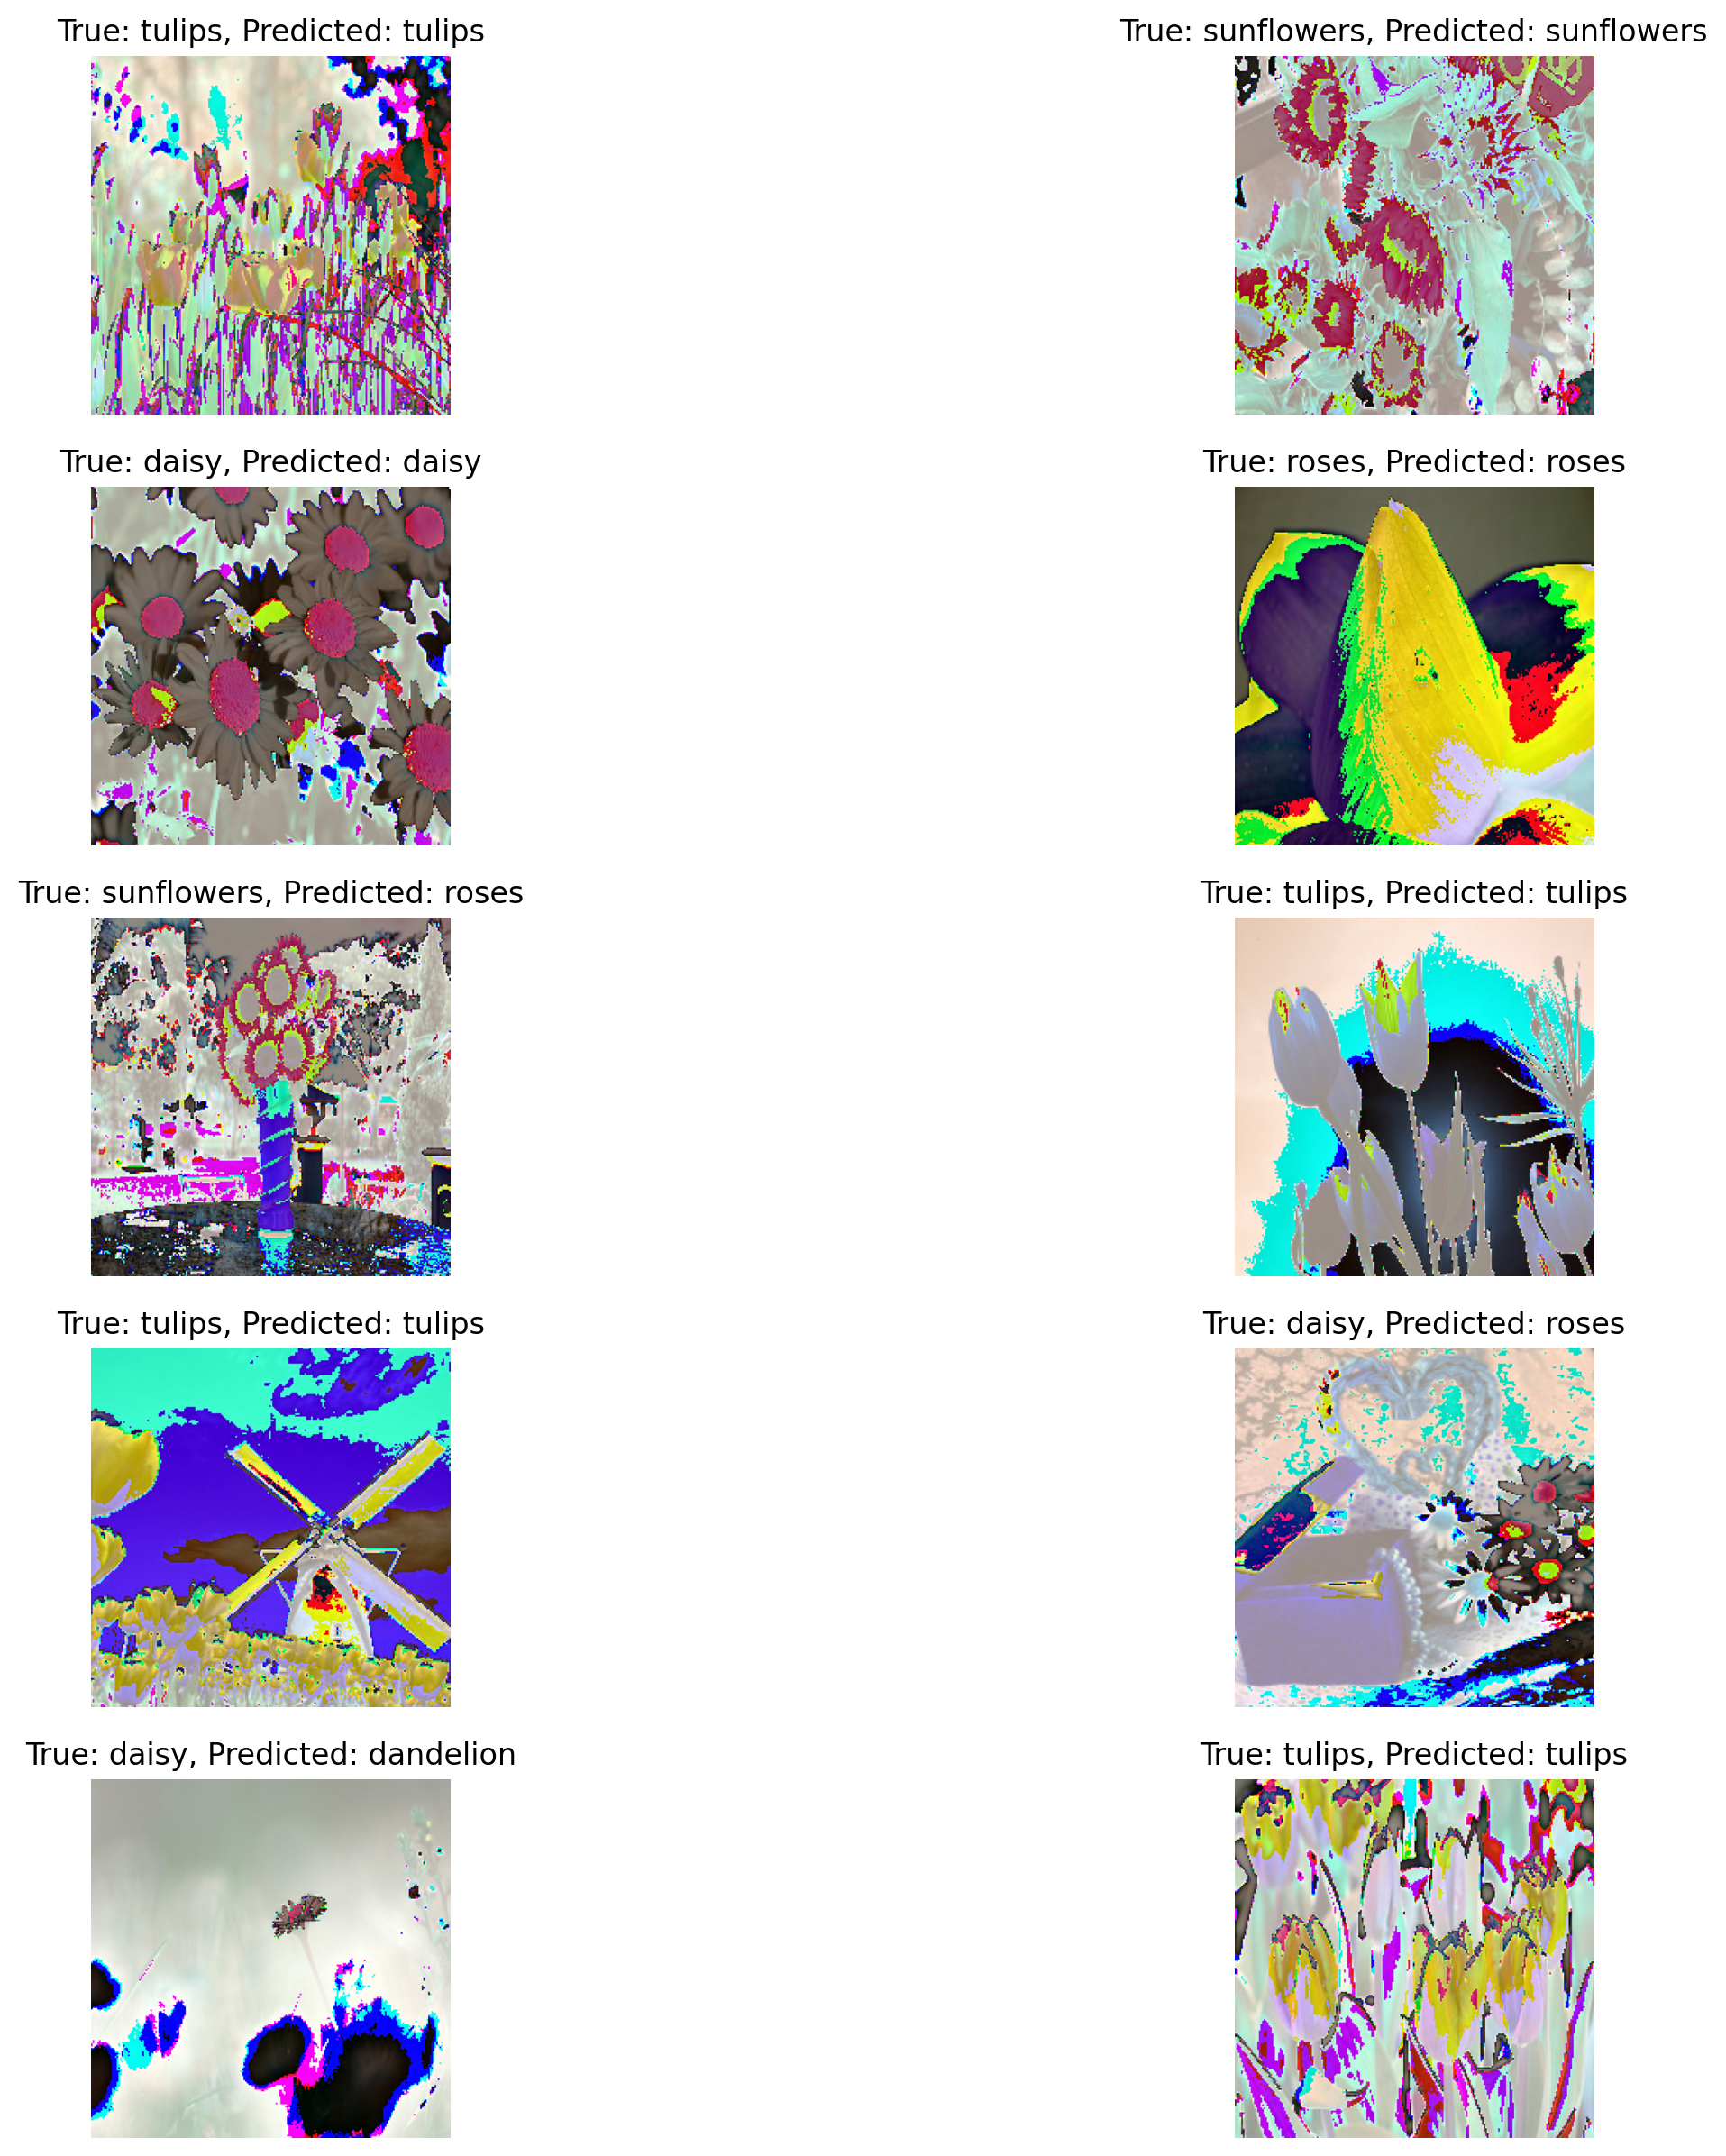

In [102]:
import matplotlib.pyplot as plt
import numpy as np

# 클래스 이름 가져오기
class_names = metadata.features['label'].names

# 테스트 데이터셋에서 10개의 이미지를 랜덤으로 선택
def display_random_predictions(dataset, num_images=10):
    plt.figure(figsize=(15, 15))

    # 테스트 데이터셋에서 랜덤으로 이미지 가져오기
    for i, (images, labels) in enumerate(dataset.shuffle(1000).take(num_images)):
        ax = plt.subplot(5, 2, i + 1)

        image = images.numpy()
        true_label = labels.numpy()

        # 모델 예측
        predictions = model.predict(tf.expand_dims(image, axis=0))
        predicted_label = np.argmax(predictions[0])

        # 이미지 및 예측 결과 출력
        plt.imshow(image.astype("uint8"))
        plt.title(f"True: {class_names[true_label]}, Predicted: {class_names[predicted_label]}")
        plt.axis('off')

    plt.show()

# 랜덤으로 10개의 이미지에 대한 예측 결과 보기
display_random_predictions(test_dataset.unbatch(), num_images=10)
